<a href="https://colab.research.google.com/github/sanjana251/ML-ACTIVITY/blob/main/RBFNN_GuassianKernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# XOR Gate Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])  # NAND problem
# Gaussian Radial Basis Function (RBF) kernel
def rbf_kernel(x1, x2, sigma=1.0):
    return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * (sigma ** 2)))
# Choose centers using k-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(X)
centers = kmeans.cluster_centers_
# Calculate the spread parameter

from scipy.spatial.distance import cdist
d_max = np.max(cdist(centers, centers, 'euclidean'))
sigma = d_max / np.sqrt(2 * len(centers))
# Compute the RBF layer output
R = np.zeros((X.shape[0], len(centers)))
for i in range(X.shape[0]):
    for j in range(len(centers)):
        R[i, j] = rbf_kernel(X[i], centers[j], sigma)
# Compute the output weights
W = np.dot(np.linalg.pinv(R), Y)
# Define the RBF network prediction function
def rbf_network(X, centers, sigma, W):
    R = np.zeros((X.shape[0], len(centers)))
    for i in range(X.shape[0]):
        for j in range(len(centers)):
            R[i, j] = rbf_kernel(X[i], centers[j], sigma)
    return np.dot(R, W)
# Make predictions
y_pred = rbf_network(X, centers, sigma, W)
print(y_pred)

[[-9.71445147e-16]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [-6.10622664e-16]]


In [2]:
# Evaluate the model
mse = np.mean(np.square(Y - y_pred))
print("Mean Squared Error:",mse)

Mean Squared Error: 4.092601131822876e-31


In [3]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# XOR Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Kernel Functions
def rbf_kernel(x1, x2, sigma=1.0):
    return np.exp(-np.linalg.norm(x1 - x2) ** 2 / (2 * (sigma ** 2)))

def polynomial_kernel(x1, x2, degree=3, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree

def sigmoid_kernel(x1, x2, alpha=0.5, coef0=1):
    return np.tanh(alpha * np.dot(x1, x2) + coef0)

# Function to compute kernel matrix
def compute_kernel_matrix(X, centers, kernel_func, **kwargs):
    R = np.zeros((X.shape[0], len(centers)))
    for i in range(X.shape[0]):
        for j in range(len(centers)):
            R[i, j] = kernel_func(X[i], centers[j], **kwargs)
    return R

# Manual centers (could also try random selection)
manual_centers = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Compute sigma for RBF
d_max = np.max(cdist(manual_centers, manual_centers, 'euclidean'))
sigma = d_max / np.sqrt(2 * len(manual_centers))

# Train and test using different kernels
kernels = {
    "RBF": (rbf_kernel, {"sigma": sigma}),
    "Polynomial": (polynomial_kernel, {"degree": 2, "coef0": 1}),
    "Sigmoid": (sigmoid_kernel, {"alpha": 0.5, "coef0": 0})
}

for name, (kernel_func, params) in kernels.items():
    print(f"\n--- Using {name} Kernel ---")

    R = compute_kernel_matrix(X, manual_centers, kernel_func, **params)
    W = np.dot(np.linalg.pinv(R), Y)  # compute weights
    y_pred = np.dot(R, W)  # predict
    mse = np.mean((Y - y_pred) ** 2)

    print("Predicted Output:\n", y_pred)
    print("Mean Squared Error:", mse)



--- Using RBF Kernel ---
Predicted Output:
 [[ 0.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [-1.66533454e-16]]
Mean Squared Error: 6.85631060201856e-32

--- Using Polynomial Kernel ---
Predicted Output:
 [[1.22124533e-15]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.44089210e-15]]
Mean Squared Error: 7.090503683256048e-30

--- Using Sigmoid Kernel ---
Predicted Output:
 [[ 0.0000000e+00]
 [ 1.0000000e+00]
 [ 1.0000000e+00]
 [-8.8817842e-16]]
Mean Squared Error: 3.944304526105059e-31



--- RBF Kernel ---
Predictions:
 [[ 0.]
 [ 1.]
 [ 1.]
 [-0.]]
MSE: 6.85631060201856e-32

--- Polynomial Kernel ---
Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]
MSE: 7.090503683256048e-30


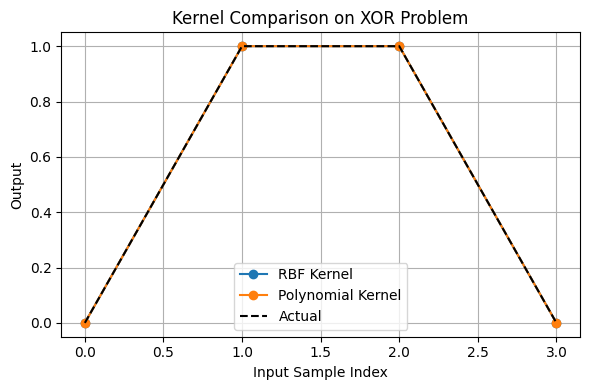

In [4]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# XOR Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Kernel functions
def rbf_kernel(x1, x2, sigma=1.0):
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * sigma**2))

def polynomial_kernel(x1, x2, degree=2, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree

# Compute RBF Layer Output
def compute_kernel_matrix(X, centers, kernel_func, **kwargs):
    R = np.zeros((X.shape[0], len(centers)))
    for i in range(X.shape[0]):
        for j in range(len(centers)):
            R[i, j] = kernel_func(X[i], centers[j], **kwargs)
    return R

# Use manual centers (all inputs)
centers = X.copy()

# Compute sigma for RBF
d_max = np.max(cdist(centers, centers, 'euclidean'))
sigma = d_max / np.sqrt(2 * len(centers))

# Define kernels to compare
kernels = {
    "RBF": (rbf_kernel, {"sigma": sigma}),
    "Polynomial": (polynomial_kernel, {"degree": 2, "coef0": 1}),
}

# Comparison loop
results = {}

for name, (kernel_func, params) in kernels.items():
    R = compute_kernel_matrix(X, centers, kernel_func, **params)
    W = np.dot(np.linalg.pinv(R), Y)
    y_pred = np.dot(R, W)
    mse = np.mean((Y - y_pred) ** 2)
    results[name] = {"predictions": y_pred, "mse": mse}

    print(f"\n--- {name} Kernel ---")
    print("Predictions:\n", np.round(y_pred, 4))
    print("MSE:", mse)

# Plotting comparison
plt.figure(figsize=(6, 4))
for name in results:
    plt.plot(np.arange(len(X)), results[name]["predictions"].flatten(), marker='o', label=f"{name} Kernel")

plt.plot(np.arange(len(X)), Y.flatten(), 'k--', label='Actual')
plt.xlabel("Input Sample Index")
plt.ylabel("Output")
plt.title("Kernel Comparison on XOR Problem")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



--- RBF Kernel ---
Predictions (rounded): [0. 0. 1. 0. 0.] ...
MSE: 0.0

--- Polynomial Kernel ---
Predictions (rounded): [-0.004  0.005  0.991 -0.004 -0.004] ...
MSE: 0.0


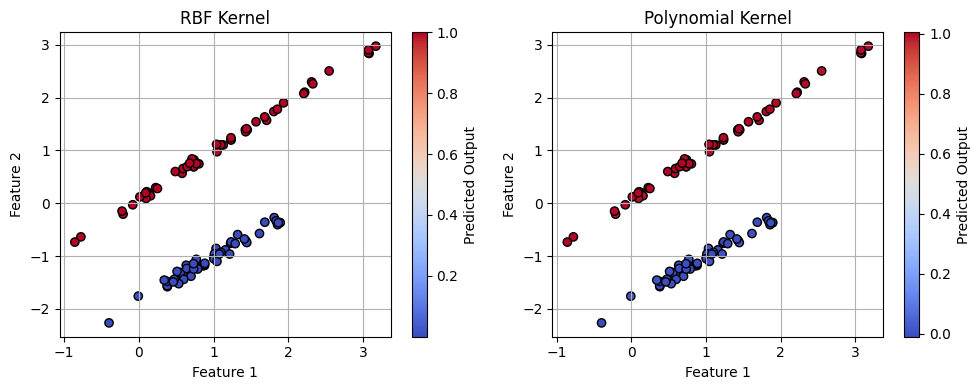

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from scipy.spatial.distance import cdist

# Step 1: Generate random binary classification data (2D for visualization)
X, Y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=42)
Y = Y.reshape(-1, 1)

# Step 2: Define Kernel Functions
def rbf_kernel(x1, x2, sigma=1.0):
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * sigma**2))

def polynomial_kernel(x1, x2, degree=3, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree

# Step 3: Helper Function to Compute Kernel Matrix
def compute_kernel_matrix(X, centers, kernel_func, **kwargs):
    R = np.zeros((X.shape[0], len(centers)))
    for i in range(X.shape[0]):
        for j in range(len(centers)):
            R[i, j] = kernel_func(X[i], centers[j], **kwargs)
    return R

# Step 4: Select centers (use training inputs as centers)
centers = X.copy()
d_max = np.max(cdist(centers, centers, 'euclidean'))
sigma = d_max / np.sqrt(2 * len(centers))

# Step 5: Compare RBF and Polynomial kernels
kernels = {
    "RBF": (rbf_kernel, {"sigma": sigma}),
    "Polynomial": (polynomial_kernel, {"degree": 3, "coef0": 1}),
}

results = {}

for name, (kernel_func, params) in kernels.items():
    R = compute_kernel_matrix(X, centers, kernel_func, **params)
    W = np.dot(np.linalg.pinv(R), Y)
    y_pred = np.dot(R, W)
    mse = np.mean((Y - y_pred) ** 2)
    results[name] = {"predictions": y_pred, "mse": mse}

    print(f"\n--- {name} Kernel ---")
    print("Predictions (rounded):", np.round(y_pred[:5].flatten(), 3), "...")
    print("MSE:", round(mse, 4))

# Step 6: Plot predictions
plt.figure(figsize=(10, 4))
for i, name in enumerate(results):
    plt.subplot(1, 2, i+1)
    plt.title(f"{name} Kernel")
    plt.scatter(X[:, 0], X[:, 1], c=results[name]["predictions"].flatten(), cmap='coolwarm', edgecolors='k')
    plt.colorbar(label='Predicted Output')
    plt.grid(True)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()
